In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [39]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [41]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [42]:
X = df.drop('class', axis=1)
y = df['class'].map({'e': 0, 'p': 1})

In [43]:
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [45]:
model_no_pca = LogisticRegression(max_iter=100)
model_no_pca.fit(X_train, y_train)

y_train_pred_no_pca = model_no_pca.predict(X_train)
y_test_pred_no_pca  = model_no_pca.predict(X_test)

acc_train_no_pca = accuracy_score(y_train, y_train_pred_no_pca)
acc_test_no_pca  = accuracy_score(y_test, y_test_pred_no_pca)

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LogisticRegression(max_iter=500)
model_pca.fit(X_train_pca, y_train)

y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca  = model_pca.predict(X_test_pca)

acc_train_pca = accuracy_score(y_train, y_train_pred_pca)
acc_test_pca  = accuracy_score(y_test, y_test_pred_pca)

# If you used OneHotEncoder
encoded_feature_names = encoder.get_feature_names_out(X.columns)

loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=encoded_feature_names)
print(loadings)
print(pca.explained_variance_)  # Eigenvalues
# print(pca.components_) 


pca_full = PCA()  # Keep all components
pca_full.fit(X_scaled)

# Get all eigenvalues
eigenvalues = pca_full.explained_variance_

# Sort in descending order
top2_eigenvalues = np.sort(eigenvalues)[::-1][:2]

print("Top 2 eigenvalues:", top2_eigenvalues)

                  PC1       PC2
cap-shape_b  0.075623  0.026230
cap-shape_c  0.002905  0.009361
cap-shape_f -0.007338 -0.041058
cap-shape_k -0.094399  0.132238
cap-shape_s  0.011342  0.001831
...               ...       ...
habitat_l   -0.089916  0.179408
habitat_m    0.078910 -0.009130
habitat_p   -0.135387 -0.019274
habitat_u    0.041992 -0.005556
habitat_w    0.027916  0.063071

[117 rows x 2 columns]
[10.32176999  9.50091938]
Eigenvalues of all components:
10.31484925543766
Top 2 eigenvalues: [10.31484926  9.42671062]


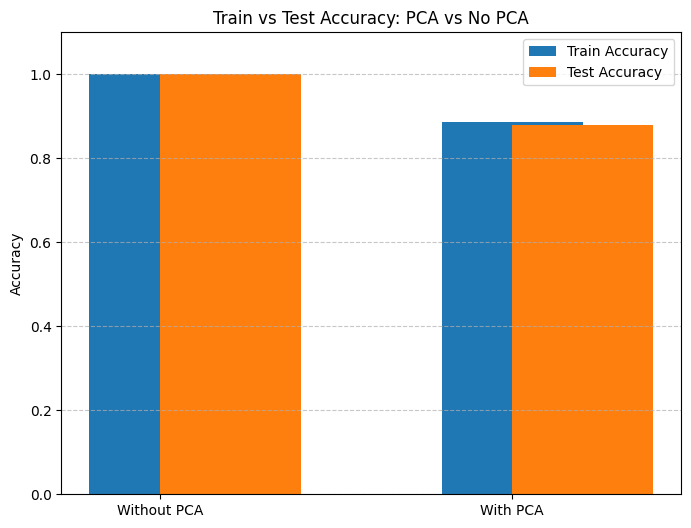

In [ ]:
methods = ['Without PCA', 'With PCA']
train_accuracies = [acc_train_no_pca, acc_train_pca]
test_accuracies  = [acc_test_no_pca, acc_test_pca]

x = range(len(methods))

plt.figure(figsize=(8,6))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')

plt.xticks(x, methods)
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.title('Train vs Test Accuracy: PCA vs No PCA')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()